TODO:

- [ ] Update Planning TODO list
- [ ] Create script version

# Executive Summary

This notebook will attempt to answer the following research question:

    What's money got to do with it?

## PLANNING

- [X] Planning
    - [X] import libraries/packages
    - [X] configure notebook environment
    - [X] define helper functions
- [X] Acquire data
    - [X] get PEIMS financial data
    - [X] get STAAR performance data
    - [X] get ETHNICITY data
- [X] Use Dtale to analyze the dataset
         
*First, let's prepare the notebook environment*

In [1]:
# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

<Figure size 2000x2000 with 0 Axes>

In [2]:
# get the ETHNICITY, PEIMS, and STAAR datasets
ethnic = pd.read_csv('../data/inter/clean_ethnic_2019.csv')
staar = pd.read_csv('../data/inter/clean_staar_2019.csv')
peims = pd.read_csv('../data/inter/clean_peims_2019.csv')

In [3]:
ethnic.head()
staar.head()
peims.head()

,District,Percentage of Non-White Students
0,1902,0.145315
1,1903,0.211415
2,1904,0.213158
3,1906,0.268657
4,1907,0.717973


,District,Total Number of Students,Total Number of Passing Students
0,1902,932,842
1,1903,1991,1651
2,1904,1365,1064
3,1906,569,420
4,1907,5497,3274


,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses
0,1902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633
1,1903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465
2,1904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481
3,1906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786
4,1907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0


In [4]:
peims = peims.rename(columns={'DISTRICT':'District'})

In [5]:
# prep to do string operations onthe District columns
ethnic = ethnic.astype({"District": str})
staar = staar.astype({"District": str})
peims = peims.astype({"District": str})

In [6]:
# padd District numbers with 0's
ethnic['District'] = ethnic['District'].str.zfill(6)
staar['District'] = staar['District'].str.zfill(6)
peims['District'] = peims['District'].str.zfill(6)

In [7]:
ethnic.head()
staar.head()
peims.head()

,District,Percentage of Non-White Students
0,001902,0.145315
1,001903,0.211415
2,001904,0.213158
3,001906,0.268657
4,001907,0.717973


,District,Total Number of Students,Total Number of Passing Students
0,001902,932,842
1,001903,1991,1651
2,001904,1365,1064
3,001906,569,420
4,001907,5497,3274


,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0


In [8]:
# merge all the dataframes together on  District
df = pd.merge(peims, staar, on=['District'])
df = pd.merge(df, ethnic, on=['District'])

In [9]:
df.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   District                              1250 non-null   object 
 1   Payroll                               1250 non-null   int64  
 2   Professional and Contracted           1250 non-null   int64  
 3   Supplies and Materials                1250 non-null   int64  
 4   Other Operating                       1250 non-null   int64  
 5   Instruction and Transfer              1250 non-null   int64  
 6   Instructional Resource Media Service  1250 non-null   int64  
 7   Curriculum/Staff Development          1250 non-null   int64  
 8   Instructional Leadership              1250 non-null   int64  
 9   Campus Administration                 1250 non-null   int64  
 10  Guidance and Counseling               1250 non-null   int64  
 11  Social Work      

In [11]:
df.shape

(1250, 36)

In [12]:
df = df.drop_duplicates('District')
df.shape

(1198, 36)

In [14]:
# create a new column based on total program operating expenditure per student
df['Total Program Expenditure Per Student'] = df['Total Program Expenditures']/df['Total Number of Students']

In [15]:
df.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433


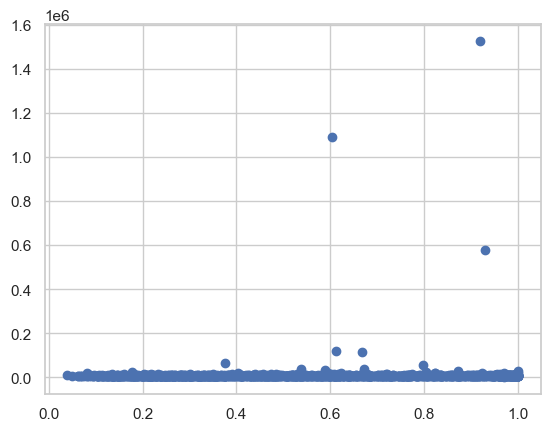

In [16]:
plt.scatter(df['Percentage of Non-White Students'], df['Total Program Expenditure Per Student'])

{'whiskers': [<matplotlib.lines.Line2D at 0x219c2ba40a0>,
 'caps': [<matplotlib.lines.Line2D at 0x219c2ba45e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x219c2d4ddc0>],
 'medians': [<matplotlib.lines.Line2D at 0x219c2ba4b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x219c2ba4dc0>],
 'means': []}

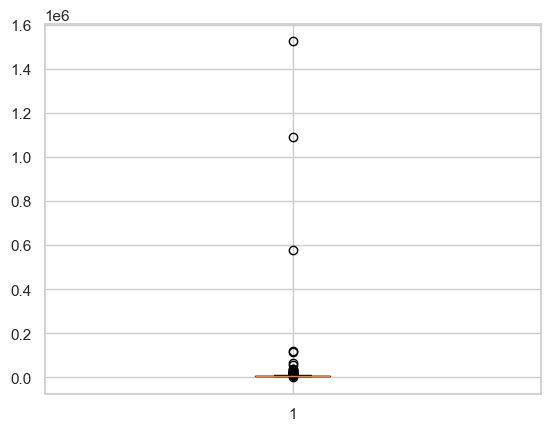

In [17]:
plt.boxplot(df['Total Program Expenditure Per Student'])

In [18]:
percentile25 = df['Total Program Expenditure Per Student'].quantile(0.25)
percentile75 = df['Total Program Expenditure Per Student'].quantile(0.75)

print("75th quartile: ", percentile75)
print("25th quartile: ", percentile25)

iqr = percentile75 - percentile25

upper_bound = percentile75 + 1.5 * iqr
lower_bound = percentile25 - 1.5 * iqr

df = df[df['Total Program Expenditure Per Student'] < upper_bound]
df = df[df['Total Program Expenditure Per Student'] > lower_bound]
df.shape

75th quartile:  7938.1571877065435
25th quartile:  5943.386321853544


(1123, 37)

array([[<Axes: title={'center': 'Payroll'}>,
        <Axes: title={'center': 'Professional and Contracted'}>,
        <Axes: title={'center': 'Supplies and Materials'}>,
        <Axes: title={'center': 'Other Operating'}>,
        <Axes: title={'center': 'Instruction and Transfer'}>,
        <Axes: title={'center': 'Instructional Resource Media Service'}>],
       [<Axes: title={'center': 'Curriculum/Staff Development'}>,
        <Axes: title={'center': 'Instructional Leadership'}>,
        <Axes: title={'center': 'Campus Administration'}>,
        <Axes: title={'center': 'Guidance and Counseling'}>,
        <Axes: title={'center': 'Social Work'}>,
        <Axes: title={'center': 'Health Services'}>],
       [<Axes: title={'center': 'Transportation'}>,
        <Axes: title={'center': 'Food Service'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'General Adminstration'}>,
        <Axes: title={'center': 'Plant Maintenance/Operation'}>,
        <A

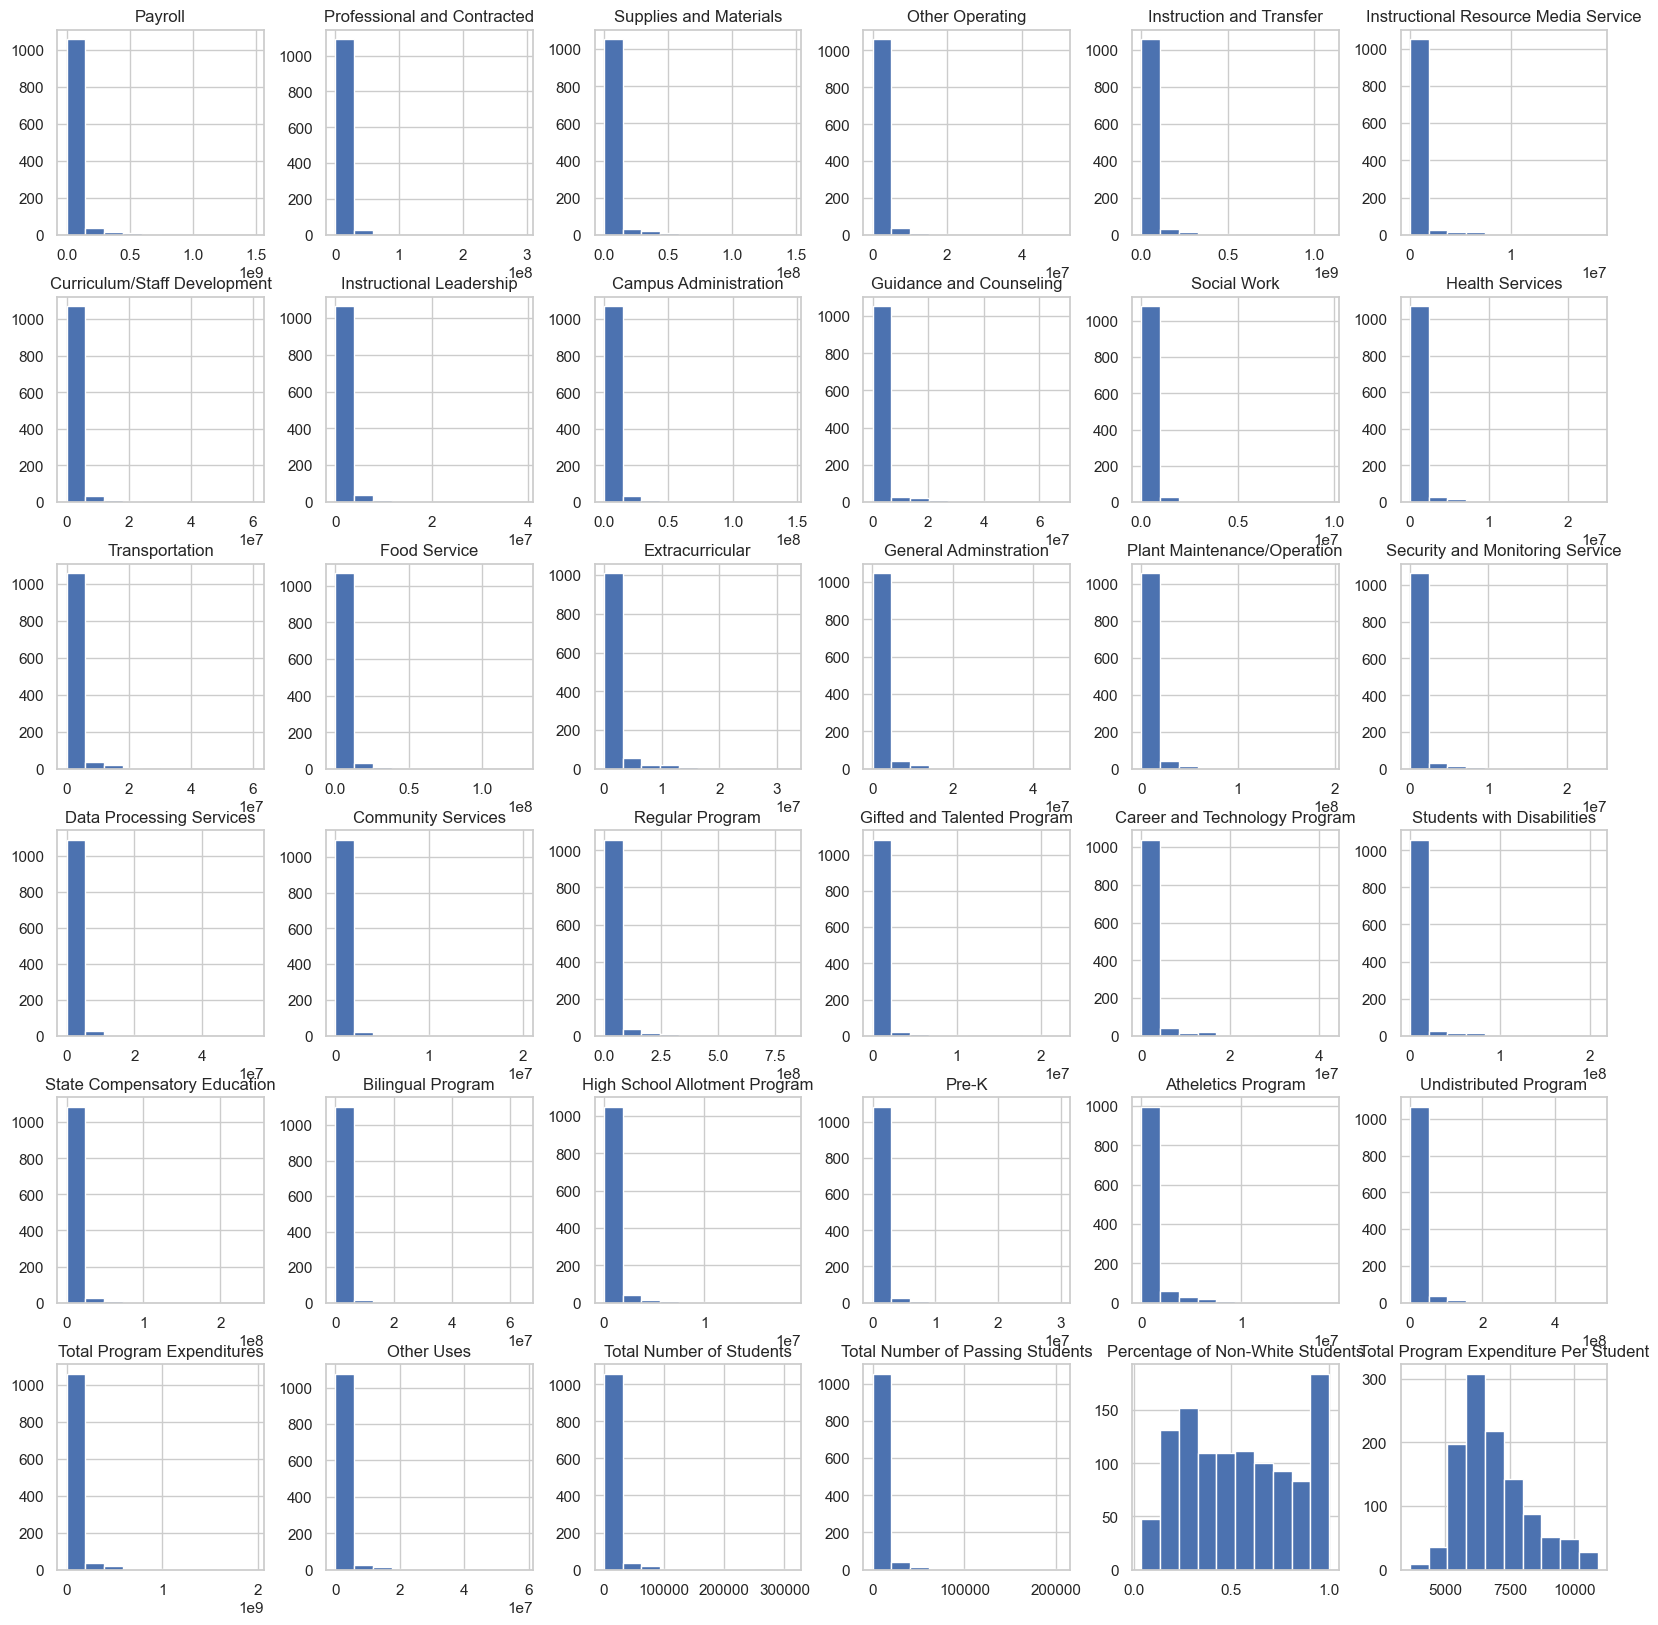

In [19]:
df.hist(figsize=(20,20))

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Percentage of Non-White Students')

Text(0, 0.5, 'Total Program Expenditure Per Student')

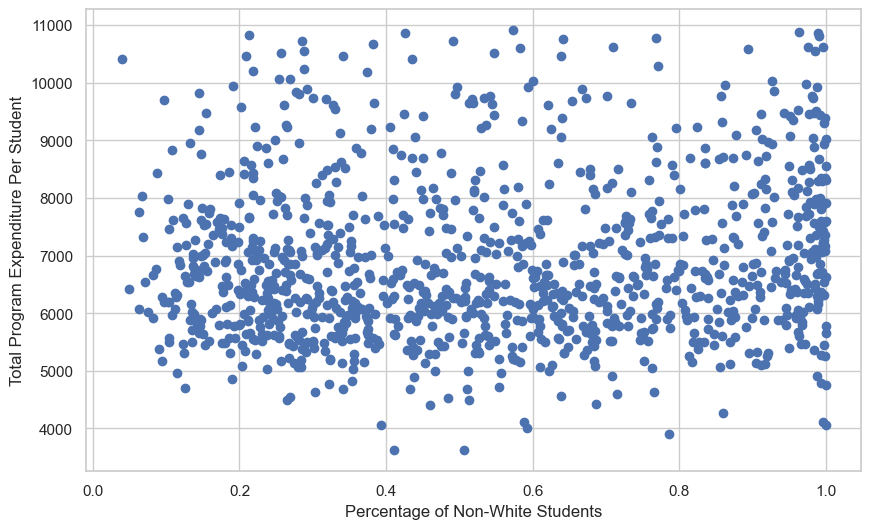

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['Percentage of Non-White Students'], df['Total Program Expenditure Per Student'])
plt.xlabel('Percentage of Non-White Students')
plt.ylabel('Total Program Expenditure Per Student')

In [21]:
df.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433


In [22]:
df.describe()

,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student
count,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1123.000000,1123.000000,1123.000000,1123.000000
mean,3.766072e+07,4.438902e+06,4.127956e+06,1.264932e+06,2.663834e+07,5.370697e+05,1.085085e+06,7.786356e+05,2.812613e+06,1.791429e+06,1.359301e+05,4.943514e+05,1.450459e+06,2.586162e+06,1.460179e+06,1.528787e+06,4.616835e+06,4.964365e+05,8.448403e+05,2.353652e+05,2.103794e+07,3.705738e+05,1.480516e+06,5.832890e+06,4.132318e+06,6.130500e+05,5.096158e+05,5.091956e+05,9.684394e+05,1.203798e+07,4.749251e+07,9.314996e+05,7691.323241,5358.402493,0.546075,6880.611394
std,1.054610e+08,1.247683e+07,1.069091e+07,2.993751e+06,7.370248e+07,1.495642e+06,3.833688e+06,2.406881e+06,8.176398e+06,5.277575e+06,6.055103e+05,1.524033e+06,4.190985e+06,7.597724e+06,2.943904e+06,3.210577e+06,1.163130e+07,1.581895e+06,2.622720e+06,1.056895e+06,5.836517e+07,1.590105e+06,3.407862e+06,1.689474e+07,1.325387e+07,2.880348e+06,1.482842e+06,1.944450e+06,1.834878e+06,3.142946e+07,1.295473e+08,4.053269e+06,20892.030010,15783.794698,0.280358,1369.433052
min,1.911600e+05,6.316600e+04,3.131400e+04,5.373000e+03,4.564780e+05,0.000000e+00,0.000000e+00,-7.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.354400e+04,1.349800e+04,0.000000e+00,0.000000e+00,-6.500000e+02,5.493000e+04,0.000000e+00,0.000000e+00,1.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.123790e+05,-6.533000e+03,106.000000,31.000000,0.039216,3623.770069
25%,3.410406e+06,5.656915e+05,4.691175e+05,1.873920e+05,2.568536e+06,2.850950e+04,1.447150e+04,0.000000e+00,2.736230e+05,7.542750e+04,0.000000e+00,3.184200e+04,9.478850e+04,2.282650e+05,1.848580e+05,3.384815e+05,5.750870e+05,7.869000e+03,7.780350e+04,0.000000e+00,1.925447e+06,8.306000e+03,1.945760e+05,2.739095e+05,4.069235e+05,7.767000e+03,2.996550e+04,7.915000e+02,1.320775e+05,1.460598e+06,4.749616e+06,0.000000e+00,660.500000,395.500000,0.292488,5917.787457
50%,7.901258e+06,1.221476e+06,1.020417e+06,3.883620e+05,5.807932e+06,1.020280e+05,9.756400e+04,1.152440e+05,6.347930e+05,2.695080e+05,0.000000e+00,9.022000e+04,2.642290e+05,5.319740e+05,5.511330e+05,5.640200e+05,1.242282e+06,5.461000e+04,1.963580e+05,7.880000e+02,4.410307e+06,2.688800e+04,4.680080e+05,9.450870e+05,9.138070e+05,3.791300e+04,9.020300e+04,6.863600e+04,3.934460e+05,3.106156e+06,1.088755e+07,2.326000e+04,1632.000000,1003.000000,0.526573,6594.803213
75%,2.248498e+07,3.287998e+06,2.827124e+06,9.881800e+05,1.644245e+07,3.159195e+05,4.663715e+05,4.650680e+05,1.758363e+06,1.032061e+06,2.491550e+04,2.694075e+05,9.099855e+05,1.604056e+06,1.296108e+06,1.266061e+06,3.329138e+06,2.532280e+05,5.210850e+05,5.978600e+04,1.252290e+07,1.065090e+05,1.129818e+06,3.373594e+06,2.598652e+06,2.498835e+05,2.790165e+05,2.373855e+05,9.423045

In [23]:
# creates a new column and designates a row as either diverse or not
df['Diverse'] = np.where(df['Percentage of Non-White Students']>=0.551026, 1, 0)

In [29]:
# creates a new column and designates a row as either effective or not
df['Low Cost'] = np.where(df['Total Program Expenditure Per Student']<6860.908489, 1, 0)

In [25]:
# create a new column based on total program operating expenditure per student
df['Passing Rate'] = df['Total Number of Passing Students']/df['Total Number of Students']

In [26]:
# creates a new column and designates a row as either passing or not
df['Passing'] = np.where(df['Passing Rate']>=0.75, 1, 0)

In [30]:
df.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student,Diverse,Effective,Passing Rate,Passing,Low Cost
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0,0.903433,1,0
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,1,0.829232,1,1
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,1,0.779487,1,1
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979,0,0,0.738137,0,0
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433,1,1,0.595598,0,1


In [33]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param) 

show_values(df, ['Diverse', 'Low Cost', 'Passing'])

Diverse
Diverse
0    594
1    529
Name: count, dtype: int64


Low Cost
Low Cost
1    659
0    464
Name: count, dtype: int64


Passing
Passing
0    808
1    315
Name: count, dtype: int64




<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Program Expenditure Per Student')

Text(0, 0.5, 'Passing Rate')

Text(0.5, 1.0, 'All Districts')

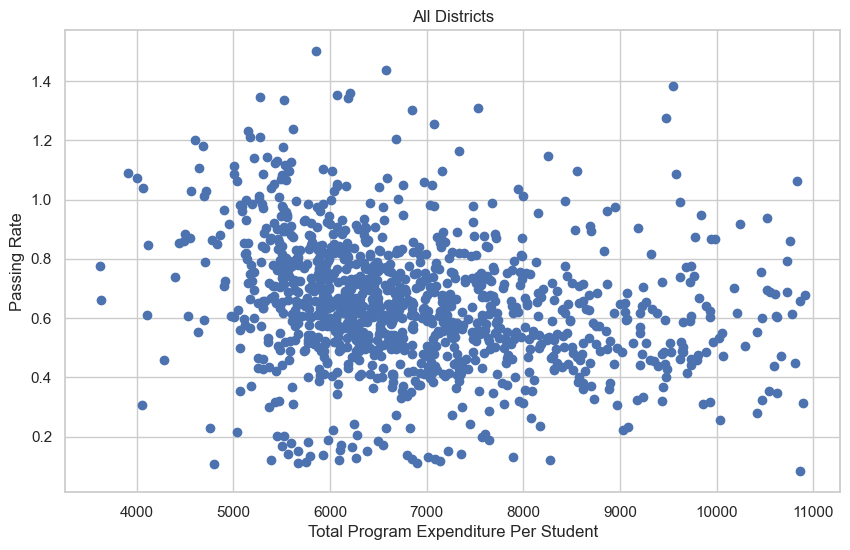

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df['Total Program Expenditure Per Student'], df['Passing Rate'])
plt.xlabel('Total Program Expenditure Per Student')
plt.ylabel('Passing Rate')
plt.title('All Districts')
plt.show()

In [35]:
df.describe()

,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student,Diverse,Passing Rate,Passing,Low Cost
count,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,3.766072e+07,4.438902e+06,4.127956e+06,1.264932e+06,2.663834e+07,5.370697e+05,1.085085e+06,7.786356e+05,2.812613e+06,1.791429e+06,1.359301e+05,4.943514e+05,1.450459e+06,2.586162e+06,1.460179e+06,1.528787e+06,4.616835e+06,4.964365e+05,8.448403e+05,2.353652e+05,2.103794e+07,3.705738e+05,1.480516e+06,5.832890e+06,4.132318e+06,6.130500e+05,5.096158e+05,5.091956e+05,9.684394e+05,1.203798e+07,4.749251e+07,9.314996e+05,7691.323241,5358.402493,0.546075,6880.611394,0.471060,0.647013,0.280499,0.586821
std,1.054610e+08,1.247683e+07,1.069091e+07,2.993751e+06,7.370248e+07,1.495642e+06,3.833688e+06,2.406881e+06,8.176398e+06,5.277575e+06,6.055103e+05,1.524033e+06,4.190985e+06,7.597724e+06,2.943904e+06,3.210577e+06,1.163130e+07,1.581895e+06,2.622720e+06,1.056895e+06,5.836517e+07,1.590105e+06,3.407862e+06,1.689474e+07,1.325387e+07,2.880348e+06,1.482842e+06,1.944450e+06,1.834878e+06,3.142946e+07,1.295473e+08,4.053269e+06,20892.030010,15783.794698,0.280358,1369.433052,0.499384,0.218054,0.449443,0.492624
min,1.911600e+05,6.316600e+04,3.131400e+04,5.373000e+03,4.564780e+05,0.000000e+00,0.000000e+00,-7.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.354400e+04,1.349800e+04,0.000000e+00,0.000000e+00,-6.500000e+02,5.493000e+04,0.000000e+00,0.000000e+00,1.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.123790e+05,-6.533000e+03,106.000000,31.000000,0.039216,3623.770069,0.000000,0.084187,0.000000,0.000000
25%,3.410406e+06,5.656915e+05,4.691175e+05,1.873920e+05,2.568536e+06,2.850950e+04,1.447150e+04,0.000000e+00,2.736230e+05,7.542750e+04,0.000000e+00,3.184200e+04,9.478850e+04,2.282650e+05,1.848580e+05,3.384815e+05,5.750870e+05,7.869000e+03,7.780350e+04,0.000000e+00,1.925447e+06,8.306000e+03,1.945760e+05,2.739095e+05,4.069235e+05,7.767000e+03,2.996550e+04,7.915000e+02,1.320775e+05,1.460598e+06,4.749616e+06,0.000000e+00,660.500000,395.500000,0.292488,5917.787457,0.000000,0.514772,0.000000,0.000000
50%,7.901258e+06,1.221476e+06,1.020417e+06,3.883620e+05,5.807932e+06,1.020280e+05,9.756400e+04,1.152440e+05,6.347930e+05,2.695080e+05,0.000000e+00,9.022000e+04,2.642290e+05,5.319740e+05,5.511330e+05,5.640200e+05,1.242282e+06,5.461000e+04,1.963580e+05,7.880000e+02,4.410307e+06,2.688800e+04,4.680080e+05,9.450870e+05,9.138070e+05,3.791300e+04,9.020300e+04,6.863600e+04,3.934460e+05,3.106156e+06,1.088755e+07,2.326000e+04,1632.000000,1003.000000,0.526573,6594.803213,0.000000,0.636826,0.000000,1.000000
75%,2.248498e+07,3.287998e+06,2.827124e+06,9.881800e+05,1.644245e+07,3.159195e+05,4.663715e+05,4.650680e+05,1.

In [36]:
df =  df.loc[df['Passing Rate'] <= 1]
df.shape

(1056, 41)

In [37]:
df.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student,Diverse,Passing Rate,Passing,Low Cost
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0.903433,1,0
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,0.829232,1,1
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,0.779487,1,1
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979,0,0.738137,0,0
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433,1,0.595598,0,1


In [38]:
df.describe()

,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student,Diverse,Passing Rate,Passing,Low Cost
count,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,3.607353e+07,4.320223e+06,4.013031e+06,1.214386e+06,2.544882e+07,5.128613e+05,1.044128e+06,7.714459e+05,2.720163e+06,1.711647e+06,1.378567e+05,4.773757e+05,1.400110e+06,2.548985e+06,1.383092e+06,1.485806e+06,4.459654e+06,4.851598e+05,8.103173e+05,2.237403e+05,1.995255e+07,3.209230e+05,1.440717e+06,5.509408e+06,4.214863e+06,6.037737e+05,4.600935e+05,5.189065e+05,9.278962e+05,1.167203e+07,4.562117e+07,8.843550e+05,7317.977273,4727.939394,0.552431,6931.431832,0.480114,0.615880,0.234848,0.573864
std,1.043127e+08,1.261075e+07,1.067754e+07,2.985518e+06,7.264213e+07,1.474548e+06,3.845691e+06,2.449963e+06,8.188230e+06,5.203577e+06,6.184388e+05,1.525947e+06,4.201254e+06,7.688930e+06,2.816274e+06,3.230861e+06,1.157499e+07,1.591316e+06,2.633592e+06,1.030925e+06,5.722025e+07,1.464596e+06,3.401369e+06,1.638230e+07,1.358251e+07,2.929601e+06,1.352951e+06,1.989058e+06,1.783831e+06,3.150416e+07,1.285144e+08,4.036703e+06,20562.696320,14483.632508,0.282159,1353.195117,0.499841,0.182863,0.424105,0.494748
min,4.464770e+05,6.316600e+04,3.131400e+04,5.373000e+03,4.564780e+05,0.000000e+00,0.000000e+00,-7.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.354400e+04,1.349800e+04,0.000000e+00,0.000000e+00,-6.500000e+02,5.493000e+04,0.000000e+00,0.000000e+00,1.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.123790e+05,-6.533000e+03,106.000000,31.000000,0.039216,3623.770069,0.000000,0.084187,0.000000,0.000000
25%,3.327397e+06,5.587520e+05,4.616008e+05,1.820998e+05,2.530581e+06,2.807200e+04,1.437825e+04,0.000000e+00,2.727062e+05,7.502800e+04,0.000000e+00,3.169675e+04,9.614975e+04,2.302662e+05,1.821848e+05,3.385785e+05,5.696290e+05,7.863750e+03,7.690350e+04,0.000000e+00,1.854511e+06,8.311500e+03,2.014142e+05,2.743528e+05,4.155032e+05,7.852500e+03,2.951525e+04,1.767750e+03,1.320848e+05,1.445761e+06,4.674538e+06,0.000000e+00,638.750000,378.750000,0.294096,5951.249615,0.000000,0.503534,0.000000,0.000000
50%,7.779009e+06,1.204012e+06,1.008480e+06,3.829555e+05,5.689414e+06,1.013730e+05,9.492600e+04,1.135520e+05,6.243030e+05,2.639025e+05,0.000000e+00,8.841550e+04,2.639180e+05,5.300195e+05,5.484690e+05,5.598290e+05,1.212426e+06,5.355250e+04,1.875430e+05,7.830000e+02,4.341781e+06,2.688000e+04,4.682945e+05,9.313025e+05,9.269655e+05,3.789200e+04,8.740800e+04,6.992050e+04,3.915480e+05,3.041072e+06,1.052152e+07,2.304200e+04,1596.000000,958.500000,0.533712,6633.318033,0.000000,0.625206,0.000000,1.000000
75%,2.066117e+07,3.124398e+06,2.683692e+06,9.354562e+05,1.451610e+07,2.950158e+05,4.416262e+05,4.347220e+05,1.5

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Program Expenditure Per Student')

Text(0, 0.5, 'Passing Rate')

Text(0.5, 1.0, 'All Districts')

Text(3500, 0.95, 'A')

Text(10500, 0.95, 'B')

Text(3500, 0.1, 'D')

Text(10500, 0.1, 'C')

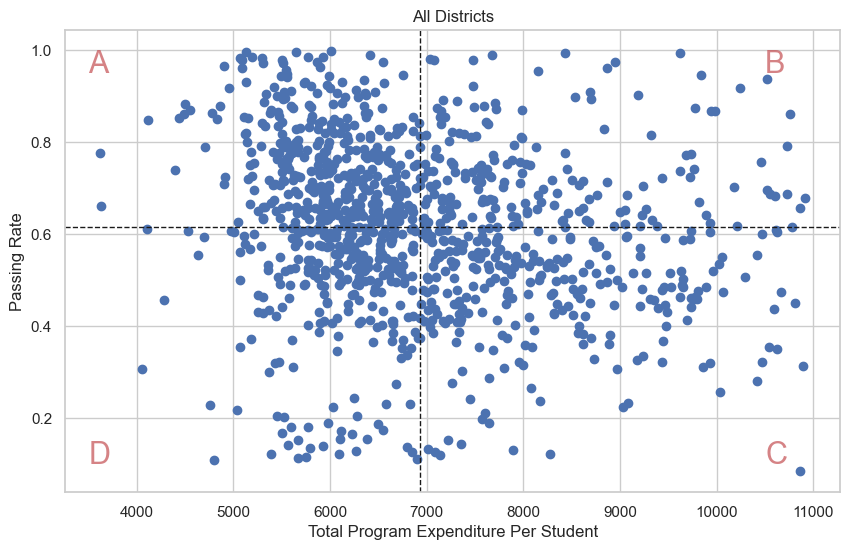

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(df['Total Program Expenditure Per Student'], df['Passing Rate'])
plt.xlabel('Total Program Expenditure Per Student')
plt.ylabel('Passing Rate')
plt.title('All Districts')

# quadrant markers          
plt.text(x=3500, y=0.95, s="A",alpha=0.7,fontsize=22, color='r')
plt.text(x=10500, y=0.95, s="B",alpha=0.7,fontsize=22, color='r')
plt.text(x=3500, y=0.10, s="D", alpha=0.7,fontsize=22, color='r')
plt.text(x=10500, y=0.10, s="C", alpha=0.7,fontsize=22, color='r')   

# benchmark mean values          
plt.axhline(y=df['Passing Rate'].mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=df['Total Program Expenditure Per Student'].mean(), color='k',linestyle='--', linewidth=1) 

plt.show()

In [42]:
# define conditions
conditions = [
    (df['Total Program Expenditure Per Student'] < df['Total Program Expenditure Per Student'].mean()) & (df['Passing Rate'] >= df['Passing Rate'].mean()),
    (df['Total Program Expenditure Per Student'] >= df['Total Program Expenditure Per Student'].mean()) & (df['Passing Rate'] >= df['Passing Rate'].mean()),
    (df['Total Program Expenditure Per Student'] >= df['Total Program Expenditure Per Student'].mean()) & (df['Passing Rate'] < df['Passing Rate'].mean()),
    (df['Total Program Expenditure Per Student'] < df['Total Program Expenditure Per Student'].mean()) & (df['Passing Rate'] < df['Passing Rate'].mean())
]

# define results
results = ['A - Low Cost & High Performing', 'B - High Cost & High Performing', 'C - High Cost & Low Performing', 'D - Low Cost & Low Performing']

# create new column based on conditions in column1 and column2
df['Quadrant'] = np.select(conditions, results)

In [43]:
df.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Program Expenditure Per Student,Diverse,Passing Rate,Passing,Low Cost,Quadrant
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0.903433,1,0,B - High Cost & High Performing
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,0.829232,1,1,A - Low Cost & High Performing
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,0.779487,1,1,A - Low Cost & High Performing
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979,0,0.738137,0,0,B - High Cost & High Performing
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433,1,0.595598,0,1,D - Low Cost & Low Performing


In [44]:
dfa =  df.loc[df['Quadrant'] == 'A - Low Cost & High Performing']
dfb =  df.loc[df['Quadrant'] == 'B - High Cost & High Performing']
dfc =  df.loc[df['Quadrant'] == 'C - High Cost & Low Performing']
dfd =  df.loc[df['Quadrant'] == 'D - Low Cost & Low Performing']

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Program Expenditure Per Student')

Text(0, 0.5, 'Passing Rate')

Text(0.5, 1.0, 'All Districts')

Text(3500, 0.95, 'A')

Text(10500, 0.95, 'B')

Text(3500, 0.1, 'D')

Text(10500, 0.1, 'C')

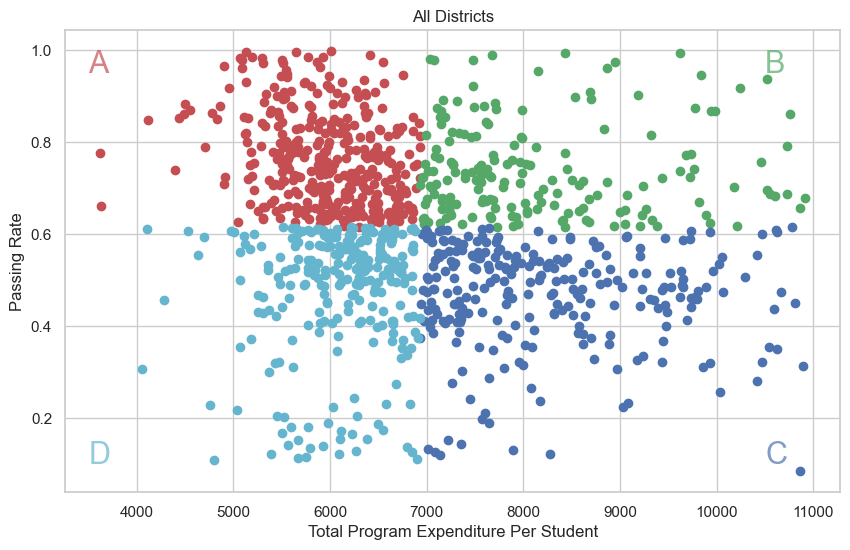

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(dfa['Total Program Expenditure Per Student'], dfa['Passing Rate'], c='r')
plt.scatter(dfb['Total Program Expenditure Per Student'], dfb['Passing Rate'], c='g')
plt.scatter(dfc['Total Program Expenditure Per Student'], dfc['Passing Rate'], c='b')
plt.scatter(dfd['Total Program Expenditure Per Student'], dfd['Passing Rate'], c='c')
plt.xlabel('Total Program Expenditure Per Student')
plt.ylabel('Passing Rate')
plt.title('All Districts')

# quadrant markers         
plt.text(x=3500, y=0.95, s="A",alpha=0.7,fontsize=22, color='r')
plt.text(x=10500, y=0.95, s="B",alpha=0.7,fontsize=22, color='g')
plt.text(x=3500, y=0.10, s="D", alpha=0.7,fontsize=22, color='c')
plt.text(x=10500, y=0.10, s="C", alpha=0.7,fontsize=22, color='b')   

plt.show()

In [46]:
# splitting passing versus not-passing
df_passing =  df.loc[df['Passing'] == 1]
df_failing =  df.loc[df['Passing'] == 0]

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Program Expenditure Per Student')

Text(0, 0.5, 'Percentage of Non-White Students')

Text(0.5, 1.0, 'Passing Districts')

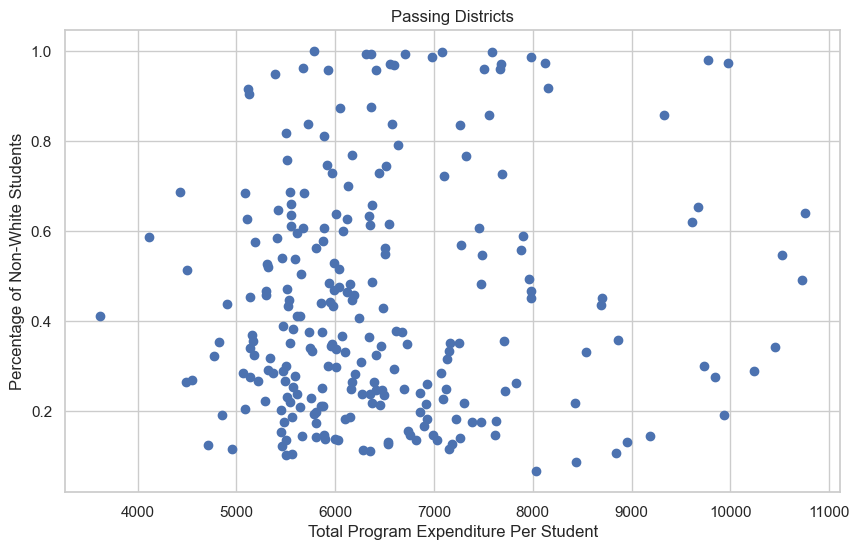

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(df_passing['Total Program Expenditure Per Student'], df_passing['Percentage of Non-White Students'])
plt.xlabel('Total Program Expenditure Per Student')
plt.ylabel('Percentage of Non-White Students')
plt.title('Passing Districts')  

plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Program Expenditure Per Student')

Text(0, 0.5, 'Percentage of Non-White Students')

Text(0.5, 1.0, 'Failing Districts')

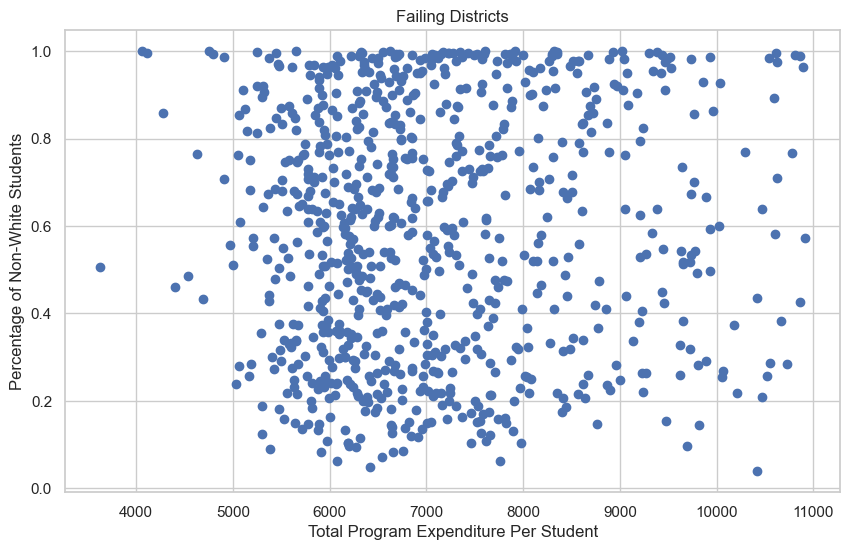

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(df_failing['Total Program Expenditure Per Student'], df_failing['Percentage of Non-White Students'])
plt.xlabel('Total Program Expenditure Per Student')
plt.ylabel('Percentage of Non-White Students')
plt.title('Failing Districts')

plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\Dd\OneDrive\Documents\_github\texas-public-schools-effectiveness\v399\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dd\OneDrive\Documents\_github\texas-public-schools-effectiveness\v399\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dd\OneDrive\Documents\_github\texas-public-schools-effectiveness\v399\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'B - High Cost & High Performing'),
 Text(1, 0, 'A - Low Cost & High Performing'),
 Text(2, 0, 'D - Low Cost & Low Performing'),
 Text(3, 0, 'C - High Cost & Low Performing')]

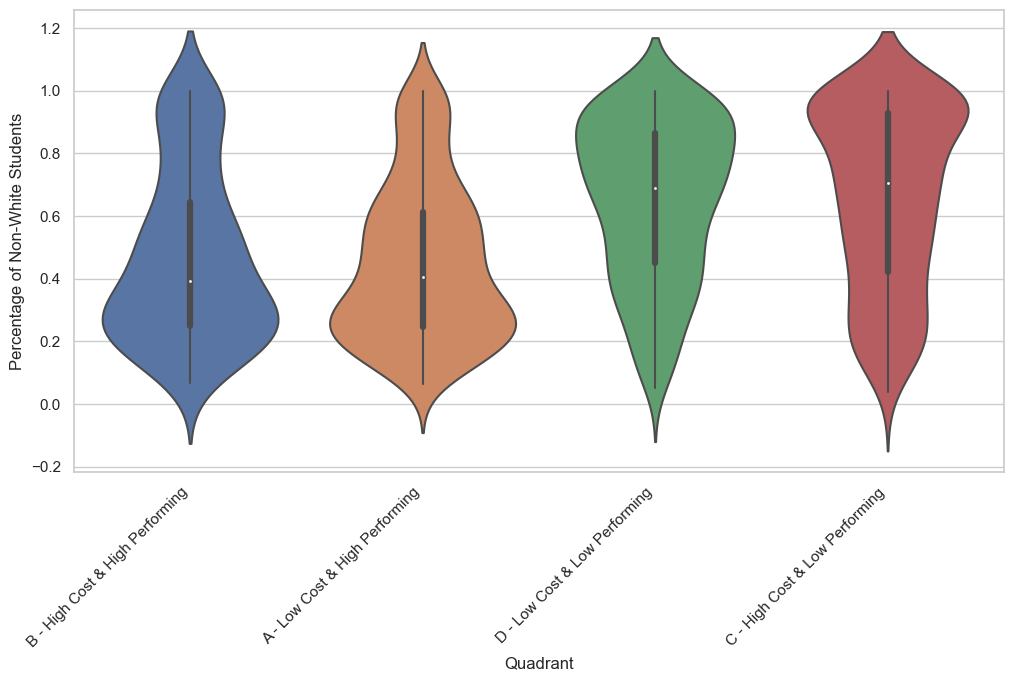

In [49]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(x="Quadrant", y="Percentage of Non-White Students", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
df.head(3)

In [50]:
df1 = df.drop(columns=['Total Number of Passing Students',
                       'Total Program Expenditure Per Student',
                       'Diverse',
                       'Low Cost',
                       'Passing',
                       'Quadrant'
                      ])

In [51]:
df1.head()

,District,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Percentage of Non-White Students,Passing Rate
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,0.145315,0.903433
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,0.211415,0.829232
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,0.213158,0.779487
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,0.268657,0.738137
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,0.717973,0.595598


In [52]:
df1.to_csv('../data/inter/clean_master_2019.csv', index=False)